In [0]:
from scipy.io.wavfile import read
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import fft
import math


In [0]:
def padder(data,size):
    new = np.zeros(int(size))
    new[0:len(data)]= data 
    return new 

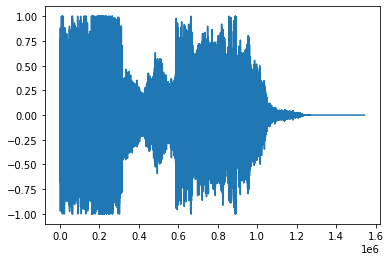

In [7]:
fs, song = read('aphex_twin_equation.wav')
channel1 = song[:,1]
channel1 = channel1/max(abs(channel1))

plt.plot(channel1)

In [14]:
window_size = 2048  #hyperparameters
step = 256   
c= 0.01

segment_no  = int(35*fs/step) 
spectogram = np.empty([segment_no,window_size])

for i in range(spectogram.shape[0]):
    try:
      spectogram[i] = np.abs(fft(channel1[i*step:i*step+window_size]))
    except:
      padded = padder(channel1[i*step:i*step+window_size],window_size)
      spectogram[i] = np.abs(fft(padded))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  del sys.path[0]


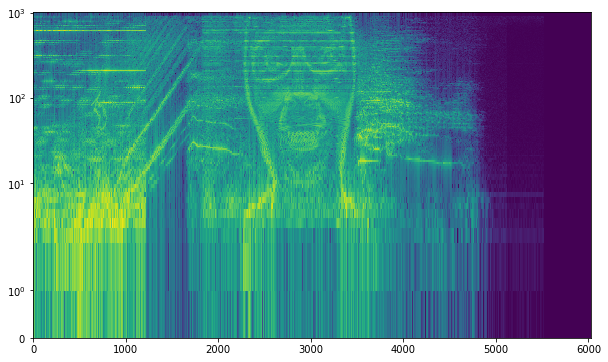

In [15]:
spectogram  = 10*np.log10(spectogram+c)
first_half = spectogram[:,:window_size//2]
fig, ax = plt.subplots(figsize=(10,6))

ax.set_yscale('symlog')
ax.pcolormesh(np.transpose(first_half))
plt.show()